<a href="https://colab.research.google.com/github/dajebbar/Logistic-Regression-Rain-in-australia/blob/main/Rain_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain in Australia

Predict next-day rain

![](https://i.imgur.com/N8aIuRK.jpg)

# Description

The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations.

# Objective

Create a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 

![](https://i.imgur.com/KWfcpcO.png)

### Classification Problems


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_. 

### Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as _regression problems_.


### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

## Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

od.version()

'0.1.20'

In [3]:
url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [4]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dajebbar
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 134MB/s]

Once the above command is executed, the dataset is downloaded and extracted to the the directory `weather-dataset-rattle-package`.

In [5]:
import os

In [6]:
data_dir = 'weather-dataset-rattle-package'

os.listdir(data_dir)

['weatherAUS.csv']

In [7]:
train_csv = data_dir + '/weatherAUS.csv'


Let's load the data from `weatherAUS.csv` using Pandas.

In [8]:
import pandas as pd

In [9]:
raw_df = pd.read_csv(train_csv)
raw_df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

In [10]:
raw_df.shape

(145460, 23)

The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`.

Let's check the data types and missing values in the various columns.

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of `RainTomorrow` or `RainToday` is missing to make our analysis and modeling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable). 

In [12]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.

In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
raw_df.Location.nunique()

49

In [16]:
fig = px.histogram(data_frame=raw_df, x='Location', y=None,
                   color='RainToday', title='Location Vs Rainy Days')
fig

In [17]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [18]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [19]:
px.scatter(data_frame=raw_df.sample(n=2000, random_state=4), x='MinTemp', y='MaxTemp',
           title='Min Temp Vs Max Temp',
           color='RainToday')

In [20]:
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [21]:
raw_df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

In [22]:
numerical_features = raw_df.select_dtypes(include=['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39bc1a0090>,
      dtype=object)

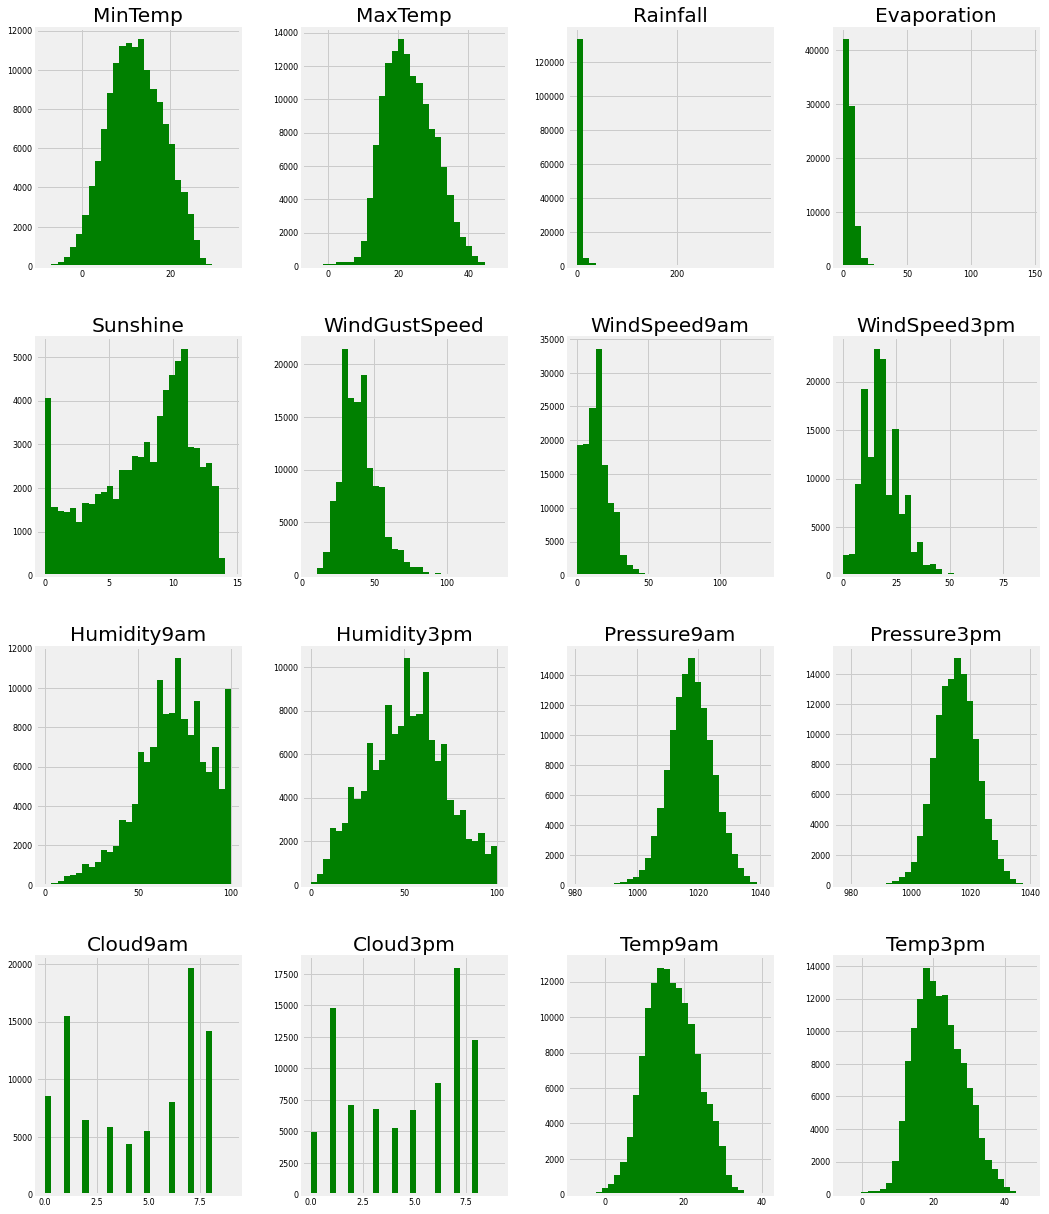

In [23]:
numerical_features.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_val_df, test_df = train_test_split(raw_df, test_size=.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=.25, random_state=42)

In [26]:
print(f"train shape: {train_df.shape}")
print(f"validation shape: {val_df.shape}")
print(f"test shape: {test_df.shape}")

train shape: (84471, 23)
validation shape: (28158, 23)
test shape: (28158, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

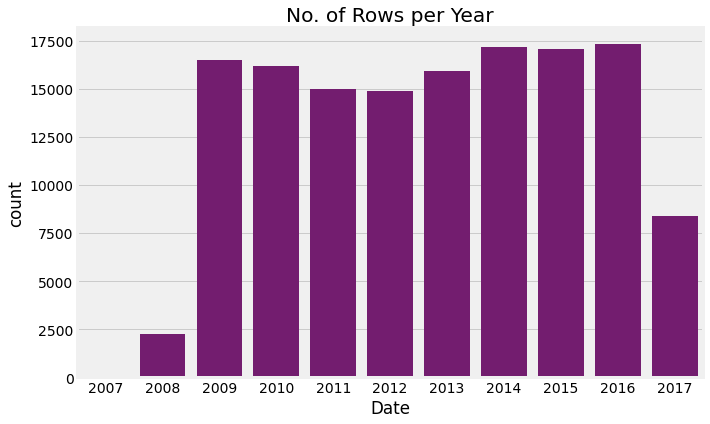

In [27]:
bar_col = sns.color_palette()[5]
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year,
              color=bar_col);

In [28]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [29]:
print(f"train shape: {train_df.shape}")
print(f"validation shape: {val_df.shape}")
print(f"test shape: {test_df.shape}")

train shape: (97988, 23)
validation shape: (17089, 23)
test shape: (25710, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [30]:
input_cols = list(raw_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [31]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [32]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [33]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [34]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [35]:
import numpy as np

In [36]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Let's view some statistics for the numeric columns.

In [37]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  97674.000000  97801.000000  ...  97414.000000  97392.000000
mean      12.007831     23.022202  ...     16.835126     21.540138
std        6.347175      6.984397  ...      6.404586      6.831612
min       -8.500000     -4.100000  ...     -5.900000     -5.100000
25%        7.500000     17.900000  ...     12.200000     16.600000
50%       11.800000     22.400000  ...     16.600000     20.900000
75%       16.600000     27.900000  ...     21.400000     26.200000
max       33.900000     48.100000  ...     40.200000     46.100000

[8 rows x 16 columns]

Let's also check the number of categories in each of the categorical columns.

In [38]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy = 'mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [41]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for `train_inputs`, `val_inputs` and `test_inputs`.

In [42]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [43]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [44]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [45]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [46]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.  

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [49]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

We can now inspect the minimum and maximum values in each column.

In [50]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [51]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [52]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range $(0,1)$

In [53]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483689      0.525947  ...      0.507089      0.517103
std        0.149458      0.131904  ...      0.134722      0.130726
min        0.000000      0.013233  ...      0.027426      0.005758
25%        0.377358      0.429112  ...      0.409283      0.422265
50%        0.478774      0.514178  ...      0.502110      0.506718
75%        0.591981      0.618147  ...      0.601266      0.604607
max        1.000000      1.000000  ...      1.000000      0.988484

[8 rows x 16 columns]

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [54]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [57]:
raw_df2 = raw_df[categorical_cols].fillna('Unknown')

In [58]:
encoder.fit(raw_df2)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [59]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

The encoder has created a list of categories for each of the categorical columns in the dataset. 

We can generate column names for each individual category using `get_feature_names`.

In [60]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

All of the above columns will be added to `train_inputs`, `val_inputs` and `test_inputs`.

To perform the encoding, we use the `transform` method of `encoder`.

In [61]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

We can verify that these new columns have been added to our training, test and validation sets.

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.350211  0.504798        No                0.0   
145455  0.492351  0.499917  0.364979  0.533589        No                0.0   
145456  0.492351  0.499917  0.381857  0.573896        No                0.0   
145457  0.492351  0.499917  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [64]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [65]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [66]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 33.5 ms, sys: 1.96 ms, total: 35.5 ms
Wall time: 35.5 ms


We can read the data back using `pd.read_parquet`.

In [67]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 296 ms, sys: 171 ms, total: 467 ms
Wall time: 310 ms


Let's verify that the data was loaded properly.

In [68]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [69]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134     Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135     Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136     Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137     Albury  0.648585  0.756144       0.0     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.683962  0.746692       0.0     0.037741  0.526244   
144914    Uluru  0.625000  0.778828       0.0     0.037741  0.526244   
144915    Uluru  0.613208  0.792060       0.0     0.037741  0.526244   
144916    Uluru  0.672170  0.826087       0.0     0.037741  0.526244   
144917    Uluru  0.655660  0.797732       0.0     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW       0.186047        ESE          W      0.053846   
2134            NE       0.387597        ESE        ESE      0.069231   
2135           NNE       0.325581         NE          N      0.153846   
2136           NNE       0.271318        ESE          W      0.053846   
2137             E       0.209302        SSE         SE      0.053846   
...            ...            ...        ...        ...           ...   
144913           E       0.356589        ESE          E      0.269231   
144914         ESE       0.372093          E        ESE      0.230769   
144915           E       0.387597          E         SE      0.253846   
144916           E       0.410853          E        SSE      0.153846   
144917          SE       0.387597        ESE          S      0.153846   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133        0.126437         0.45         0.14     0.545455       0.5424   
2134        0.103448         0.45         0.12     0.586777       0.5648   
2135        0.229885         0.35         0.19     0.618182       0.5632   
2136        0.080460         0.46         0.37     0.547107       0.5600   
2137        0.103448         0.60         0.34     0.609917       0.6016   
...              ...          ...          ...          ...          ...   
144913      0.229885         0.23         0.12     0.540496       0.5280   
144914      0.356322         0.17         0.07     0.565289       0.5408   
144915      0.252874         0.12         0.07     0.530579       0.4864   
144916      0.195402         0.12         0.12     0.441322       0.4080   
144917      0.321839         0.46         0.18     0.442975       0.4256   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2133    0.492351  0.499917  0.594937  0.731286        No                0.0   
2134    0.492351  0.499917  0.691983  0.836852        No                0.0   
2135    0.492351  0.499917  0.767932  0.813820        No                0.0   
2136    0.888889  0.555556  0.729958  0.696737        No                0.0   
2137    0.888889  0.499917  0.691983  0.727447        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144913  0.492351  0.499917  0.664557  0.737044        No                0.0   
144914  0.492351  0.499917  0.715190  0.775432        No                0.0   
144915  0.492351  0.499917  0.744726  0.769674        No                0.0   
144916  0.492351  0.111111  0.812236  0.840691        No                0.0   
144917  0.492351  0.499917  0.696203  0.790787        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2133                0.0              1.0                    0.0   
2134                0.0              1.0                    0.0   
2135                0.0              1.0                    0.0   
2136                0.0              1.0                    0.0   
2137                0.0              1.0                    0.0   
.

In [70]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(solver='liblinear')

We can train the model using `model.fit`.

In [73]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Let's check the weights and biases of the trained model.

In [74]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [75]:
print(model.coef_.tolist())

[[0.8986308285234471, -2.8799138911754927, 3.162777973732635, 0.854248269597409, -1.6713938028882502, 6.764403136831224, -0.9423229031486045, -1.4284294646789297, 0.3228912462128951, 5.995314360680441, 5.463858037674231, -9.176805627444072, -0.1622959184491541, 1.2876601195955935, 0.47471549473452984, 2.0214284405335965, 0.6016498212238328, -0.5524830233054949, 0.47814245766556623, 0.007670306686560974, 0.34681433819761137, -0.35227674862157815, 0.1797104039186718, 0.4404861247188097, -0.013982029022832979, 0.02894393815483276, 0.25814754836913567, -0.02120510811240654, -0.04279554408267608, -0.48314193856072013, -0.13756300648675002, -0.5760588831477012, -0.7875247888692999, -0.2554045621502866, -0.32888322474702786, -0.5690036964138735, 0.08183006516327823, 0.0133823024209449, 0.06412769340985286, -0.9020543748163841, -0.4443304174102129, 0.00851640589357909, -0.4606124118323262, -0.46551782914538997, -0.06949845572159848, 0.19115894752205398, 0.4504754999601165, 0.6081211392992343, 

In [76]:
print(model.intercept_)

[-2.44955425]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [77]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [78]:
train_preds = model.predict(X_train)

In [79]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [80]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

We can output a probabilistic prediction using `predict_proba`.

In [81]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94401108, 0.05598892],
       [0.94074113, 0.05925887],
       [0.96093596, 0.03906404],
       ...,
       [0.987491  , 0.012509  ],
       [0.98334663, 0.01665337],
       [0.87453303, 0.12546697]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [82]:
model.classes_

array(['No', 'Yes'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(train_targets, train_preds)

0.8519206433440829

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [87]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


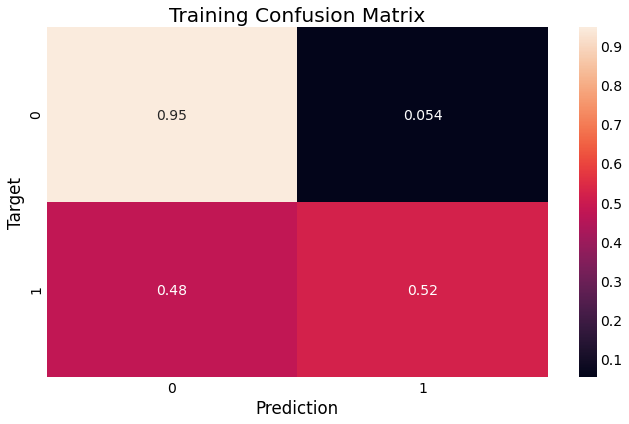

In [88]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 85.40%


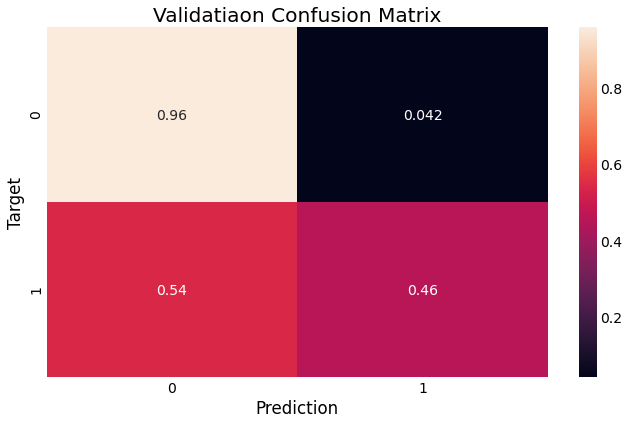

In [89]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.20%


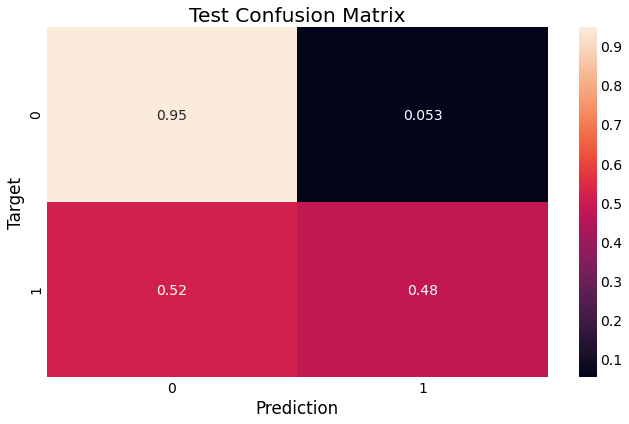

In [90]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [91]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [92]:
def all_no(inputs):
    return np.full(len(inputs), "No")

Let's check the accuracies of these two models on the test set.

In [93]:
accuracy_score(test_targets, random_guess(X_test))

0.4999222092570984

In [94]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%. 

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [95]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`. This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [96]:
new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

We've now created a Pandas dataframe with the same columns as `raw_df` (except `RainTomorrow`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Imputation of missing values using the `imputer` created earlier
2. Scaling numerical features using the `scaler` created earlier
3. Encoding categorical features using the `encoder` created earlier

In [97]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [98]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093  0.737044                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_Unknown  WindGustDir_W  \
0              0.0             0.0                  0.0            0.0   

   WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  \
0             0.0            0.0                 0.0           0.0   

   WindDir9am_WNW  WindDir9am_WSW  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0         

We can now make a prediction using `model.predict`.

In [101]:
prediction = model.predict(X_new_input)[0]

In [102]:
prediction

'Yes'

Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

In [103]:
prob = model.predict_proba(X_new_input)[0]

In [104]:
prob

array([0.48102629, 0.51897371])

Looks like our model isn't too confident about its prediction!

Let's define a helper function to make predictions for individual inputs.

In [105]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

We can now use this function to make predictions for individual inputs.

In [106]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [107]:
predict_input(new_input)

('Yes', 0.6474962052641611)